In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
L = F =  5
N = (L+F)*100

**Exercise 1- generate data**
- Compile code_1.stan and code_2.stan
- Generate data for rest of excercises.

In [3]:
model_1 = CmdStanModel(stan_file='D:\Studia\DataAnalytics\DataAnalytics\lab7\code_1.stan')
model_2 = CmdStanModel(stan_file='D:\Studia\DataAnalytics\DataAnalytics\lab7\code_2.stan')
model_3 = CmdStanModel(stan_file='D:\Studia\DataAnalytics\DataAnalytics\lab7\code_3.stan')
model_4 = CmdStanModel(stan_file='D:\Studia\DataAnalytics\DataAnalytics\lab7\code_4.stan')
model_5 = CmdStanModel(stan_file='D:\Studia\DataAnalytics\DataAnalytics\lab7\code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [4]:
samples1 = model_1.sample(data={'N': N}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

samples2 = model_2.sample(data={'N': N}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

y1 = samples1.stan_variable('y')
y2 = samples2.stan_variable('y')

INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:03 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:11 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


**Exercise 2- compare normal and student models for data from first file**
- Compile both models
- Fit both models
- Using az.compare and az.plot_compare analyze both models using loo and waic criteria.

In [5]:
fit3 = model_3.sample(data={'N': N, 'y': y1[0]}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

fit4 = model_4.sample(data={'N': N, 'y': y1[0]}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:05 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:06 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


D:\anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
D:\anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


        rank          loo  p_loo       d_loo    weight         se        dse  \
model4     0 -2264.346355    0.0    0.000000  0.805939  48.815028   0.000000   
model3     1 -2748.588020    0.0  484.241665  0.194061  27.469979  44.872973   

        warning loo_scale  
model4     True       log  
model3     True       log  


<AxesSubplot:xlabel='Log'>

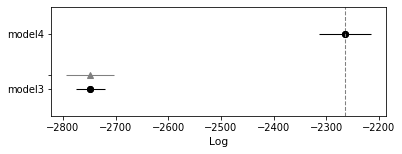

In [6]:
compare_dict = {'model3' : fit3, 'model4' : fit4}
loo = az.compare(compare_dict, ic = "loo")
print(loo)
az.plot_compare(loo)

        rank         waic        p_waic      d_waic    weight         se  \
model4     0 -2264.346355  1.320167e-24    0.000000  0.805939  48.815028   
model3     1 -2748.588020  1.235989e-24  484.241665  0.194061  27.469979   

              dse  warning waic_scale  
model4   0.000000    False        log  
model3  44.872973    False        log  


<AxesSubplot:xlabel='Log'>

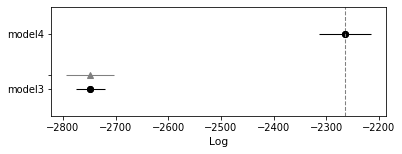

In [7]:
waic = az.compare(compare_dict, ic = 'waic')
print(waic)
az.plot_compare(waic)

**Excercise 3 - compare models with different numbers of predictors**
- Compile model
- Compare models for 1, 2 and 3 predictors as in previous excercise

In [8]:
K5_1 = 1
x5 = samples2.stan_variable('X')
x5_1 = x5[0,:,0:1]
fit5 = model_5.sample(data={'N': N, 'K' : K5_1, 'y': y1[0], 'X' : x5_1}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:07 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [9]:
K5_2 = 2
x5_2 = x5[0,:,0:2]
fit5_1 = model_5.sample(data={'N': N, 'K' : K5_2, 'y': y1[0], 'X' : x5_2}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:08 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [10]:
K5_3 = 3
x5_3 = x5[0,:,0:3]
fit5_2 = model_5.sample(data={'N': N, 'K' : K5_3, 'y': y1[0], 'X' : x5_3}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:08 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


D:\anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
D:\anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
D:\anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto 

             rank            loo  p_loo          d_loo    weight  \
model_pred1     0   -2215.336610    0.0       0.000000  0.927386   
model_pred3     1  -21111.212285    0.0   18895.875675  0.021391   
model_pred2     2 -147532.476992    0.0  145317.140382  0.051223   

                       se           dse  warning loo_scale  
model_pred1    194.486632      0.000000     True       log  
model_pred3   4199.938157   4012.487285     True       log  
model_pred2  38545.557176  38354.472584     True       log  


<AxesSubplot:xlabel='Log'>

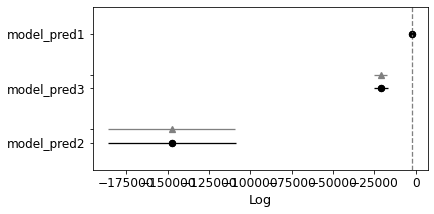

In [11]:
compare_dict2 = {'model_pred1' : fit5, 'model_pred2' : fit5_1, 'model_pred3' : fit5_2}
loo2 = az.compare(compare_dict2, ic = "loo")
print(loo2)
az.plot_compare(loo2)

             rank           waic        p_waic         d_waic    weight  \
model_pred1     0   -2215.336610  5.236663e-24       0.000000  0.927386   
model_pred3     1  -21111.212285  2.276899e-21   18895.875675  0.021391   
model_pred2     2 -147532.476992  2.547249e-20  145317.140382  0.051223   

                       se           dse  warning waic_scale  
model_pred1    194.486632      0.000000    False        log  
model_pred3   4199.938157   4012.487285    False        log  
model_pred2  38545.557176  38354.472584    False        log  


<AxesSubplot:xlabel='Log'>

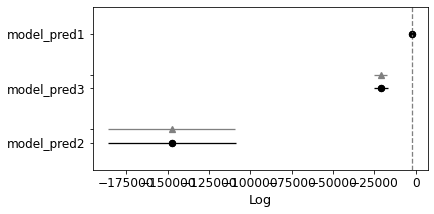

In [12]:
waic2 = az.compare(compare_dict2, ic = "waic")
print(waic2)
az.plot_compare(waic2)